In [59]:
from sklearn.datasets import load_boston

#数据加载
data=load_boston()
X=data['data']
y=data['target']

y=y.reshape(-1,1)
print(y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [60]:
# 数据规范化
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
X=ss.fit_transform(X)

In [61]:
import torch
# 数据集切分
X=torch.from_numpy(X).type(torch.FloatTensor)
y=torch.from_numpy(y).type(torch.FloatTensor)


In [62]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [63]:
from torch import nn
def create_net():
    net = nn.Sequential()
    net.add_module("linear1",nn.Linear(13,10))
    net.add_module("relu1",nn.ReLU())
    net.add_module("linear2",nn.Linear(10,5))
    net.add_module("relu2",nn.ReLU())
    net.add_module("linear3",nn.Linear(5,1))
    return net
    
model=create_net()

In [64]:
#定义优化器和损失函数
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [65]:
# 训练
max_epoch=400
iter_loss=[]
for i in range(max_epoch):
    #y_pred=model(train_x)
    #前向传播
    y_pred=model(train_x)
    loss=criterion(y_pred,train_y)
    print(i,loss.item())
    iter_loss.append(loss.item())
    #清空之前的梯度
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #权重调整
    optimizer.step()

0 609.1055297851562
1 606.3177490234375
2 603.0639038085938
3 599.651611328125
4 595.9425048828125
5 591.978515625
6 587.7202758789062
7 583.1156616210938
8 578.1221313476562
9 572.6891479492188
10 566.7767333984375
11 560.3557739257812
12 553.3715209960938
13 545.7717895507812
14 537.5615234375
15 528.729248046875
16 519.2547607421875
17 509.12164306640625
18 498.3155822753906
19 486.82696533203125
20 474.65045166015625
21 461.78692626953125
22 448.2440490722656
23 434.0367126464844
24 419.1888427734375
25 403.7346496582031
26 387.7191467285156
27 371.19989013671875
28 354.247802734375
29 336.9488220214844
30 319.4045104980469
31 301.73345947265625
32 284.0711669921875
33 266.5708923339844
34 249.40269470214844
35 232.75209045410156
36 216.81764221191406
37 201.80665588378906
38 187.92904663085938
39 175.3885955810547
40 164.37159729003906
41 155.0326385498047
42 147.4774932861328
43 141.74505615234375
44 137.7895050048828
45 135.4672393798828
46 134.5343780517578
47 134.6590881347656

In [66]:
#测试
output=model(test_x)
predict=output.detach().numpy()

In [67]:
# 绘制不同iteration的loss
import matplotlib.pyplot as plt
import numpy as np

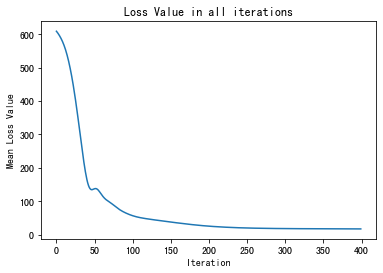

In [68]:
x=np.arange(max_epoch)
y=np.array(iter_loss)
plt.plot(x,y)
plt.title("Loss Value in all iterations")
plt.xlabel('Iteration')
plt.ylabel('Mean Loss Value')
plt.show()

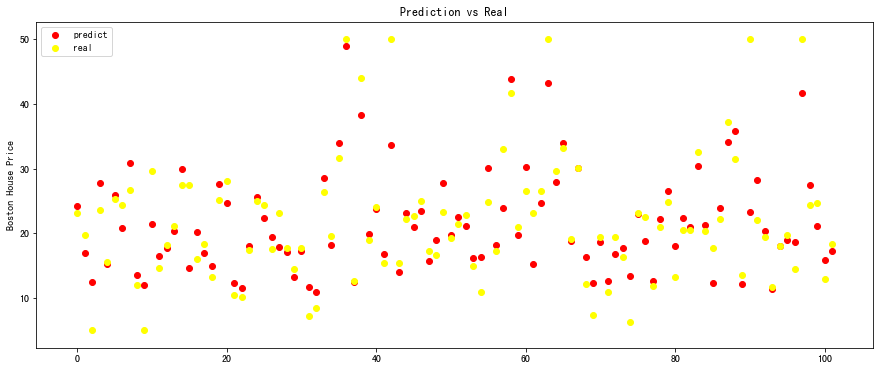

In [69]:
# 查看真实值与预测值的散点图
x=np.arange(test_x.shape[0])
y1=np.array(predict)
y2=np.array(test_y)

plt.figure(figsize=(15,6))

line1=plt.scatter(x,y1,c='red')
line2=plt.scatter(x,y2,c='yellow')

plt.legend([line1,line2],['predict','real'])
plt.title('Prediction vs Real')
plt.ylabel('Boston House Price')
#plt.ylabel()
plt.show()